# Test ML Models for Pairwise Classification

### Imports

In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neural_network import MLPClassifier

import seaborn as sns
from sklearn.metrics import classification_report
sns.set(style="darkgrid")

import time
import pickle

In [2]:
# df_withLabels = pd.read_csv('../03_SourceFiles/03_ProcessedFiles/trimer-pair-wise-df.csv',
#                             engine='c',
#                             index_col=0,
#                             low_memory=False)

In [2]:
df_train = pd.read_csv('../03_SourceFiles/03_ProcessedFiles/trimer-pair-wise-train-df.csv',
                            engine='c',
                            index_col=0,
                            low_memory=False)

In [4]:
df_test = pd.read_csv('../03_SourceFiles/03_ProcessedFiles/trimer-pair-wise-test-df.csv',
                            engine='c',
                            index_col=0,
                            low_memory=False)

In [ ]:
df_trai

In [18]:
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [19]:
X_train = df_train.drop(['l_sampleName', 'r_sampleName', 'c_sampleName', 'sibling'], axis = 1)
y_train = df_train['sibling'].copy()
X_test = df_test.drop(['l_sampleName', 'r_sampleName', 'c_sampleName', 'sibling'], axis = 1)
y_test = df_test['sibling'].copy()

In [3]:
# X - data without labels
# y - only labels
# X = df_withLabels.drop(['l_sampleName', 'r_sampleName', 'c_sampleName', 'sibling'], axis = 1)
# y = df_withLabels["sibling"].copy()

In [4]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [20]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [21]:
# Scaling the data:
if (input('Scaled the data? y/n').lower() == 'y'):
    feature_scaler = StandardScaler()
    X_train = feature_scaler.fit_transform(X_train)
    X_test = feature_scaler.transform(X_test)

In [7]:
def runMLTests(pred_score_choice, cv_value, data_type, seed):
    clf_scores_dict = {}
    clf_pred_dict = {}
    models_to_test = [
        'KNC',
        'LinearSVC',
        'RFC',
        'logisticRegression',
        'ABC',
        'GBC'
    ]
    clfs = [
        KNeighborsClassifier(n_jobs=-1),
        LinearSVC(random_state=seed),
        RandomForestClassifier(random_state=seed, n_jobs=-1),
        LogisticRegression(solver='saga'),
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed)
    ]
    if pred_score_choice == 's':
        for name, estimator in zip(models_to_test, clfs):
            time_start = time.time()
            print(name)
            clf_score = cross_val_score(estimator, X_train, y_train, cv=cv_value, n_jobs=-1)
            print(clf_score)
            print('** Time to complete: ', (time.time() - time_start), 'seconds')
            clf_scores_dict[name] = clf_score
        return clf_scores_dict
    
    elif pred_score_choice == 'p':
        for name, estimator in zip(models_to_test, clfs):
            time_start = time.time()
            print(name)
            clf_pred = cross_val_predict(estimator, X_train, y_train, cv=cv_value, n_jobs=-1)
            print(classification_report(y_train, clf_pred))
            clf_pred_dict[name] = clf_pred
            print('** Time to complete: ', (time.time() - time_start), 'seconds')
        return clf_pred_dict

In [8]:
trimer_scores = runMLTests('s', 5, 'trimers', 42)

KNC
[0.79828445 0.81433315 0.81571666 0.81156613 0.80188157]
** Time to complete:  661.7438735961914 seconds
LinearSVC
[0.54261206 0.55035971 0.54510238 0.5481461  0.54510238]
** Time to complete:  646.2524893283844 seconds
RFC
[0.89457665 0.89097952 0.89457665 0.89679026 0.89817377]
** Time to complete:  41.72453331947327 seconds
logisticRegression
[0.63004981 0.64831212 0.65218594 0.66353071 0.64333149]
** Time to complete:  180.57966494560242 seconds
ABC
[0.64969563 0.64969563 0.6449917  0.65938019 0.63945766]
** Time to complete:  408.5825307369232 seconds
GBC
[0.89540675 0.88987272 0.88516879 0.89817377 0.89402324]
** Time to complete:  2119.773077249527 seconds


In [9]:
trimer_predictions = runMLTests('p', 5, 'trimers', 42)
trimer_predictions['GroundTruth'] = y_train

KNC
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      9581
           1       0.80      0.80      0.80      8489

    accuracy                           0.81     18070
   macro avg       0.81      0.81      0.81     18070
weighted avg       0.81      0.81      0.81     18070

** Time to complete:  639.9797956943512 seconds
LinearSVC
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      9581
           1       0.52      0.50      0.51      8489

    accuracy                           0.55     18070
   macro avg       0.54      0.54      0.54     18070
weighted avg       0.55      0.55      0.55     18070

** Time to complete:  646.9150731563568 seconds
RFC
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      9581
           1       0.88      0.90      0.89      8489

    accuracy                           0.90     18070
   macro avg  

In [10]:
df_scores = pd.DataFrame(trimer_scores)
df_scores.to_csv('score-trimers-pairwise-august-9.csv')
df_predictions = pd.DataFrame(trimer_predictions)
df_predictions.to_csv('pred-trimers-pairwise-august-9.csv')

In [11]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_test_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_test_pred))

precision    recall  f1-score   support

           0       0.91      0.88      0.90      2419
           1       0.87      0.90      0.88      2099

    accuracy                           0.89      4518
   macro avg       0.89      0.89      0.89      4518
weighted avg       0.89      0.89      0.89      4518



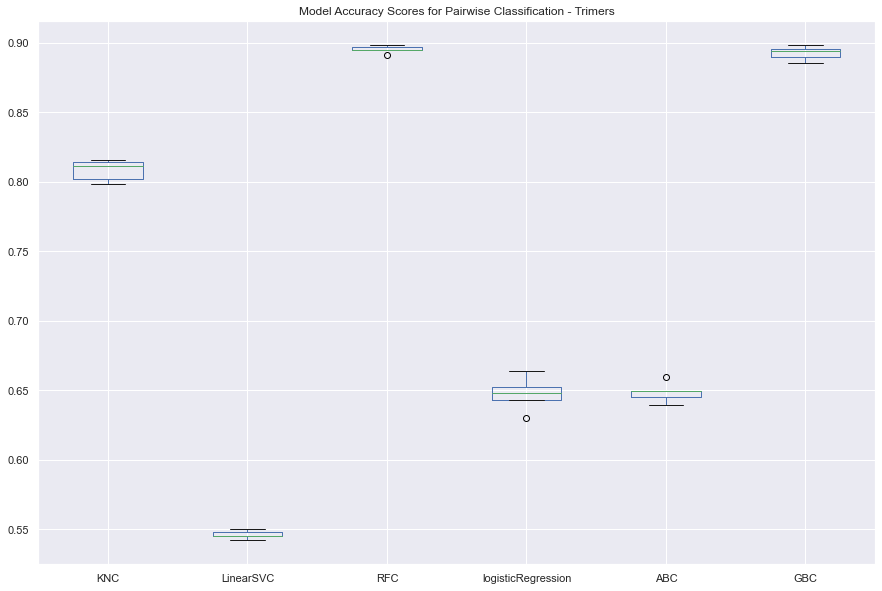

In [14]:
df_scores.plot(kind='box', figsize=(15, 10),
                   title="Model Accuracy Scores for Pairwise Classification - Trimers")
plt.savefig('pairwise-classifier-results-aug-10.png', bbox_inches='tight', format='png')

In [20]:
# Improve performance of RFC:
for param, value in rfc.get_params().items():
    print(param, ' -> ', value)

bootstrap  ->  True
ccp_alpha  ->  0.0
class_weight  ->  None
criterion  ->  gini
max_depth  ->  None
max_features  ->  auto
max_leaf_nodes  ->  None
max_samples  ->  None
min_impurity_decrease  ->  0.0
min_impurity_split  ->  None
min_samples_leaf  ->  1
min_samples_split  ->  2
min_weight_fraction_leaf  ->  0.0
n_estimators  ->  100
n_jobs  ->  -1
oob_score  ->  False
random_state  ->  42
verbose  ->  0
warm_start  ->  False


In [24]:
# Create a parameter grid for Randomized Search:

# Number of trees in random forest:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num=10)]

# Number of features to consider at every split:
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [25]:
rfClf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rfClf, param_distributions = random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
time_start = time.time()
rf_random.fit(X_train, y_train)
print('** Time to complete: ', (time.time() - time_start), 'seconds')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 184.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 401.3min finished
** Time to complete:  24815.92227625847 seconds


In [26]:
print(rf_random.best_params_)

{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [27]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)

In [28]:
rf_random.best_score_

0.901604835661321

In [30]:
rf_random.estimator

RandomForestClassifier()

In [8]:
rf_trained_august10 = RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)

In [24]:
rf_trained_august10.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)

In [25]:
rf_train_pred = rf_trained_august10.predict(X_test)

In [26]:
print(classification_report(y_test, rf_train_pred))

precision    recall  f1-score   support

           0       0.74      0.93      0.83      3000
           1       0.87      0.59      0.70      2320

    accuracy                           0.78      5320
   macro avg       0.81      0.76      0.76      5320
weighted avg       0.80      0.78      0.77      5320



In [41]:
# To save model
pk1_filename = 'random_forest_classifier_august10.pkl'
with open(pk1_filename, 'wb') as file:
    pickle.dump(rf_trained_august10, file)

In [ ]:
# To load model:
with open(pkl_filename, 'rb') as file:
    pickle_model_rfc = pickle.load(file)